<a href="https://colab.research.google.com/github/gooo-01/difff/blob/master/KnowledgeGraph_(neo4j)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation of all the necessary libreries

- langchain : Tool used for building the RAG application
- langchain-community : Tool used for give additional operation to LLM to perform
- langchain-groq : Connect with GROQ for access the llm from GROQ
- neo4j : Connect with Neo4j database which store the data in Graph format
- langchain-core : Tool used for internal use of LLM

In [ ]:
!pip install langchain langchain-community langchain-groq neo4j langchain-core

- wikipedia : Helps to connect with wikipedia
- langchain_experimental : Some advance tools used in langchain to build the llm application
- tiktoken : helps to convert the string into tokens for storing the data

In [ ]:
!pip install wikipedia langchain_experimental tiktoken

### Importing groq api key

In [ ]:
from google.colab import userdata
import os

os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')

### Importing a specific topic from Wikipedia

In [ ]:
from langchain.document_loaders import WikipediaLoader
raw_documents = WikipediaLoader(query="India Independence").load()

In [ ]:
raw_documents[1]

Document(metadata={'title': 'Independence Day (India)', 'summary': "Independence Day is celebrated annually on 15 August as a public holiday in India commemorating the nation's independence from the United Kingdom on 15 August 1947, the day when the provisions of the Indian Independence Act, which transferred legislative sovereignty to the Indian Constituent Assembly, came into effect. India attained independence following the independence movement noted for largely non-violent resistance and civil disobedience led by Indian National Congress under the leadership of Mahatma Gandhi.\nIndependence coincided with the partition of India, in which British India was divided into the Dominions of India and Pakistan; the partition was accompanied by violent riots and mass casualties. On 15 August 1947, the first Prime Minister of India, Jawaharlal Nehru raised the Indian national flag above the Lahori Gate of the Red Fort in Delhi. On each subsequent Independence Day, the incumbent Prime Minis

### In this topic 25 parts are present

In [ ]:
len(raw_documents)

25

### Getting only 4 parts from that topic and devide into smaller chunks

In [ ]:
from langchain.text_splitter import TokenTextSplitter
text_splitter = TokenTextSplitter(chunk_size=512, chunk_overlap=24)
documents = text_splitter.split_documents(raw_documents[:4])

### Implementing the LLM

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(model_name = "gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x79201504ba30>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x792015087a30>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

### Converting the LLM into Graph LLM

In [ ]:
from langchain_experimental.graph_transformers import LLMGraphTransformer
llm_transformer = LLMGraphTransformer( llm = llm )

### By the help of Graph LLLM we convert all the document chunks into Cypher query language

In [ ]:
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [ ]:
graph_documents[0].nodes

[Node(id='Indian Independence Movement', type='Event', properties={}),
 Node(id='British Colonial Rule', type='Political_entity', properties={}),
 Node(id='Indian National Congress', type='Organization', properties={}),
 Node(id='Mahatma Gandhi', type='Person', properties={}),
 Node(id='Jawaharlal Nehru', type='Person', properties={}),
 Node(id='Vallabhbhai Patel', type='Person', properties={}),
 Node(id='Abdul Ghaffar Khan', type='Person', properties={}),
 Node(id='Maulana Azad', type='Person', properties={}),
 Node(id='Rabindranath Tagore', type='Person', properties={}),
 Node(id='Subramania Bharati', type='Person', properties={}),
 Node(id='Bankim Chandra Chattopadhyay', type='Person', properties={}),
 Node(id='Sarojini Naidu', type='Person', properties={}),
 Node(id='Vijaya Lakshmi Pandit', type='Person', properties={}),
 Node(id='Pritilata Waddedar', type='Person', properties={}),
 Node(id='Kasturba Gandhi', type='Person', properties={}),
 Node(id='Rowlatt Act', type='Law', proper

In [ ]:
graph_documents[0].relationships

[Relationship(source=Node(id='Indian Independence Movement', type='Event', properties={}), target=Node(id='British Colonial Rule', type='Political_entity', properties={}), type='ENDED', properties={}),
 Relationship(source=Node(id='Indian Independence Movement', type='Event', properties={}), target=Node(id='Indian National Congress', type='Organization', properties={}), type='FACILITATED_BY', properties={}),
 Relationship(source=Node(id='Indian Independence Movement', type='Event', properties={}), target=Node(id='Mahatma Gandhi', type='Person', properties={}), type='LED_BY', properties={}),
 Relationship(source=Node(id='Indian Independence Movement', type='Event', properties={}), target=Node(id='Jawaharlal Nehru', type='Person', properties={}), type='FOLLOWER_OF', properties={}),
 Relationship(source=Node(id='Indian Independence Movement', type='Event', properties={}), target=Node(id='Vallabhbhai Patel', type='Person', properties={}), type='FOLLOWER_OF', properties={}),
 Relationship(s

### Initializing Neo4j

In [ ]:
NEO4J_URI="neo4j+s://19ef4f3b.databases.neo4j.io"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="48kw6sWd1wlcT5m2eMaed3eOGr4b71KLZYXpdXkP_Zo"
AURA_INSTANCEID="19ef4f3b"
AURA_INSTANCENAME="Instance01"

In [ ]:
from langchain_community.graphs import Neo4jGraph

graph = Neo4jGraph(
    url = NEO4J_URI,
    username = NEO4J_USERNAME,
    password = NEO4J_PASSWORD,
)

### Pushing all the cypher code into Neo4j Database

In [ ]:
graph.add_graph_documents(
    graph_documents,
    baseEntityLabel=True,
    include_source=True
)

In [ ]:
graph.refresh_schema()
print(graph.schema)

Node properties:
Document {id: STRING, text: STRING, summary: STRING, source: STRING, title: STRING}
Event {id: STRING}
Political_entity {id: STRING}
Organization {id: STRING}
Person {id: STRING}
Law {id: STRING}
Legislation {id: STRING}
Place {id: STRING}
Holiday {id: STRING}
Date {id: STRING}
Country {id: STRING}
Political division {id: STRING}
Location {id: STRING}
City {id: STRING}
Political regime {id: STRING}
Political position {id: STRING}
Historical event {id: STRING}
Theme {id: STRING}
Policy {id: STRING}
Initiative {id: STRING}
Campaign {id: STRING}
Celebration {id: STRING}
River {id: STRING}
Concept {id: STRING}
Group {id: STRING}
Relationship properties:

The relationships:
(:Document)-[:MENTIONS]->(:Event)
(:Document)-[:MENTIONS]->(:Political_entity)
(:Document)-[:MENTIONS]->(:Organization)
(:Document)-[:MENTIONS]->(:Person)
(:Document)-[:MENTIONS]->(:Law)
(:Document)-[:MENTIONS]->(:Legislation)
(:Document)-[:MENTIONS]->(:Place)
(:Document)-[:MENTIONS]->(:Holiday)
(:Docume

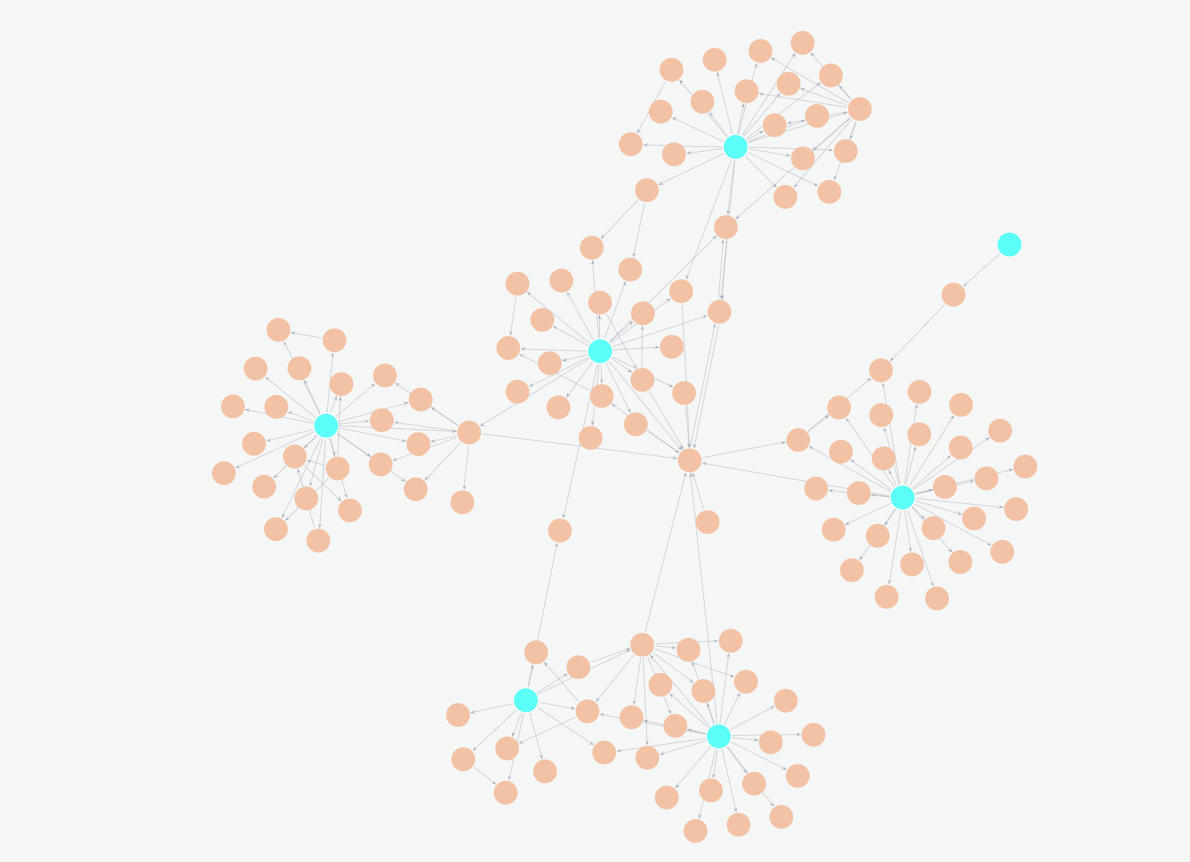

In [ ]:
from langchain.chains import GraphCypherQAChain

chain = GraphCypherQAChain.from_llm(
    llm = llm, graph = graph, verbose = True, allow_dangerous_requests=True
)

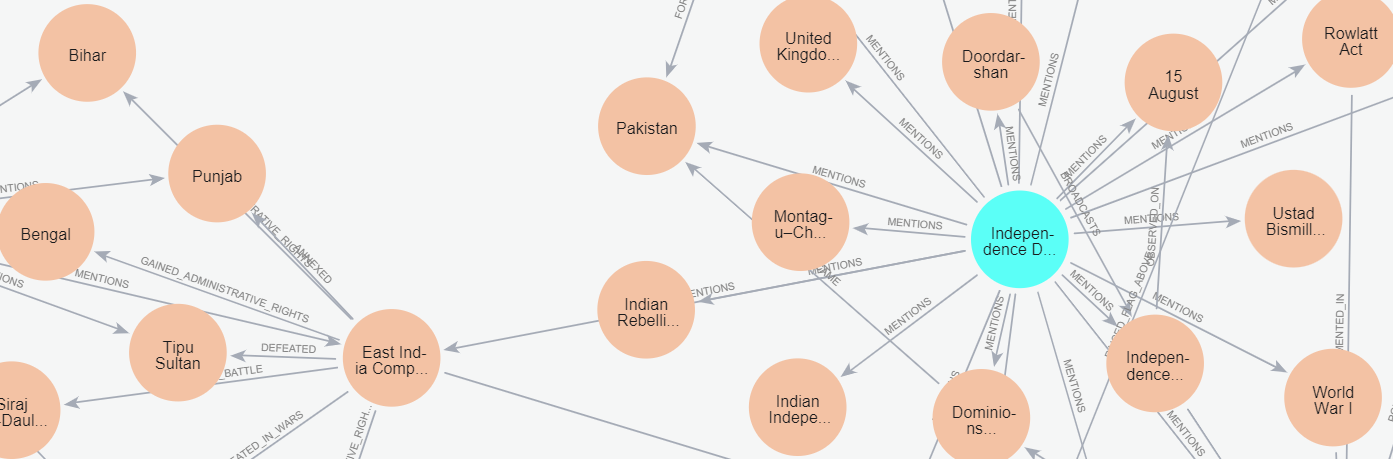

In [ ]:
res = chain.invoke({"query" : "Who 1st raised the flag at in Indepence of India and where ?"})
res



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (p:Person)-[:RAISED_FLAG_ABOVE]->(l:Location)
WHERE p.id = 'Jawaharlal Nehru'
RETURN p.id, l.id 

Full Context:
[{'p.id': 'Jawaharlal Nehru', 'l.id': 'Lahori Gate'}, {'p.id': 'Jawaharlal Nehru', 'l.id': 'Red Fort'}]

> Finished chain.


{'query': 'Who 1st raised the flag at in Indepence of India and where ?',
 'result': 'Jawaharlal Nehru raised the flag at the Red Fort on Independence of India.  \n'}